Osnabrück University - Computer Vision (Winter Term 2022/23) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 03: Morphological Operations¶

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, November 27, 2022**. If you need help (and Google and other resources were not enough) use the StudIP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (complex numbers) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *complex number*, what is the *complex plane*, how are complex numbers usually denoted?

YOUR ANSWER HERE

**b)** What is the *real* and the *imaginary* part of a complex number? What is the *absolute value* of a complex number? What is the *complex conjugate*?

YOUR ANSWER HERE

**c)** What are polar coordinates? What are their advantages? Can you convert between cartesian and polar coordinates? Can you write down $i=\sqrt{-1}$ in polar coordinates? What about $\sqrt{i}$?

YOUR ANSWER HERE

**d)** Python, and also numpy, support calculations with complex numbers. Consult the documentation to find out details. Notice that $i$ is substituted by $j$ in Python.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Assignment 1: Properties of morphological operators (5 points)

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-05 slides 4-14).

### a) Duality

Proof that *erosion* and *dilation* are *dual* operators, i.e.

$$ g^{\ast}\oplus S = (g\ominus S)^{\ast}\qquad\text{and}\qquad
g^{\ast}\ominus S = (g\oplus S)^{\ast}$$

here $g^{\ast}$ denotes the inverted binary image, i.e. $g^{\ast}(x,y) = 1 - g(x,y) = \neg g(x,y)$, i.e. 1-pixel become 0 and 0-pixel become 1.

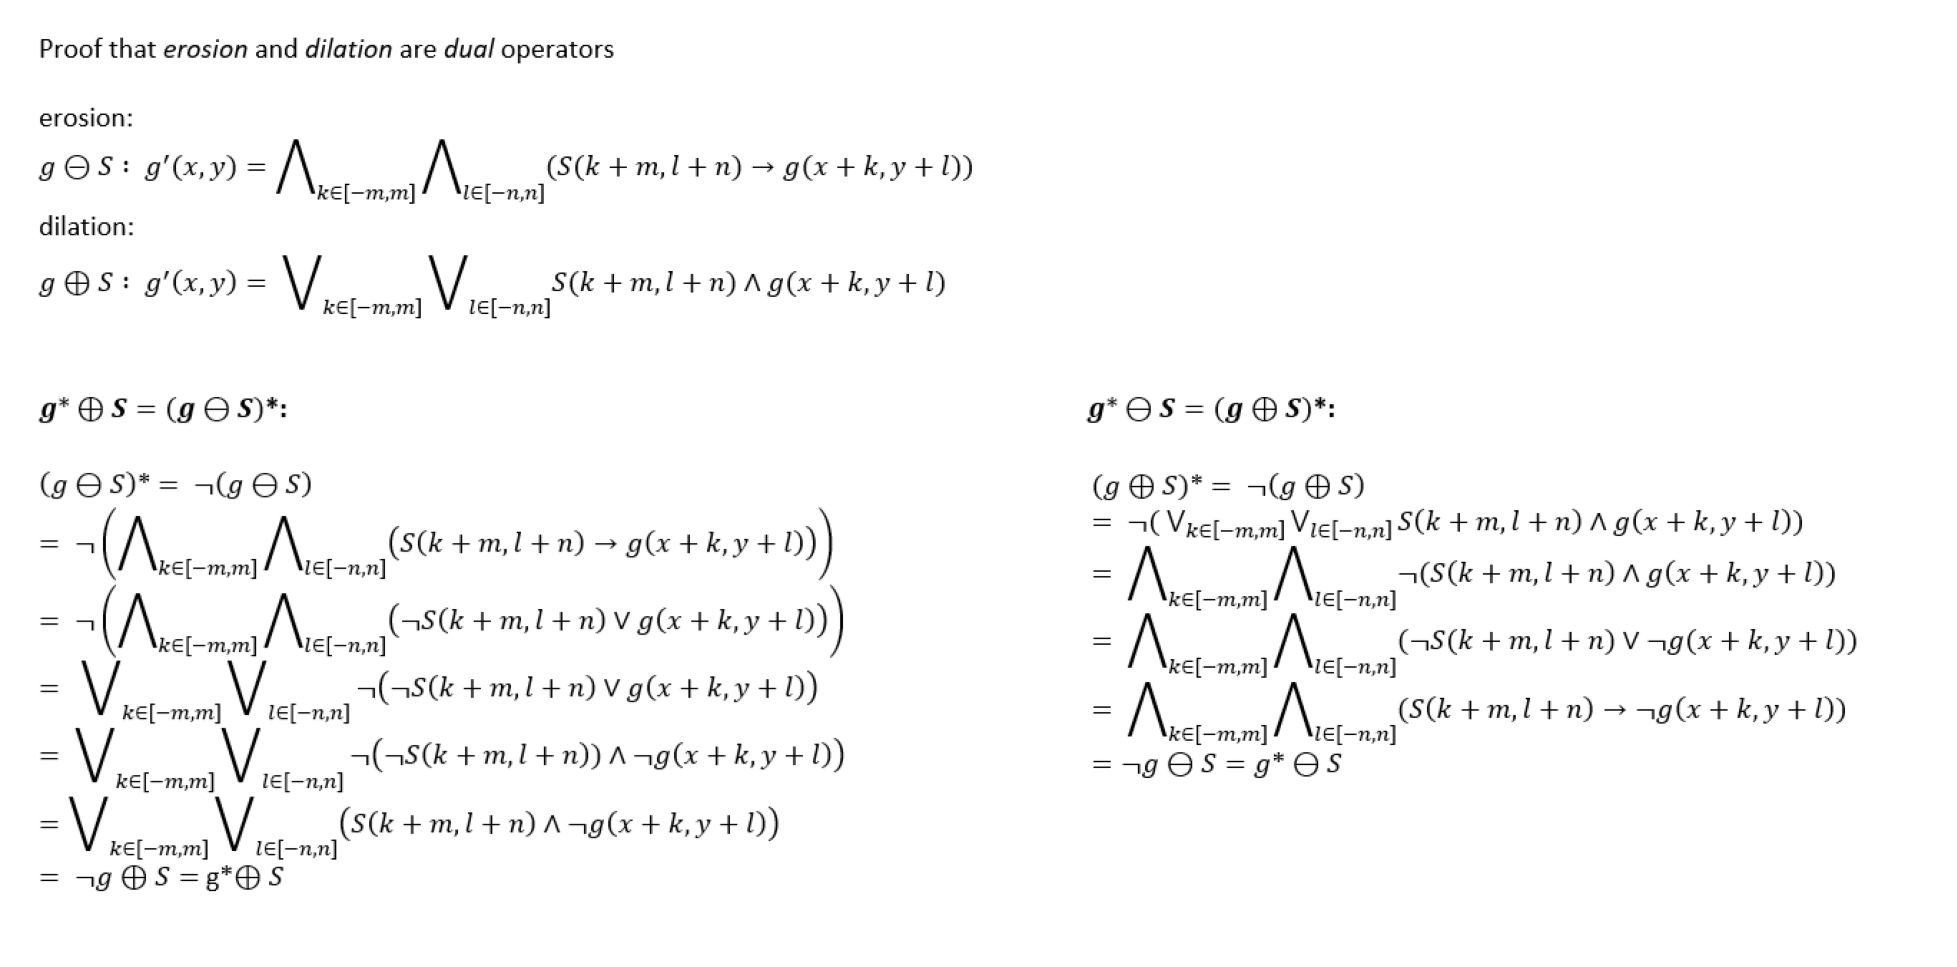

In [2]:
from imageio.v2 import imread
import matplotlib.pyplot as plt

img = imread("images/dual_operator_proof.png")
plt.figure(figsize=(25,25))
plt.axis('off')
plt.imshow(img)
plt.show()

### b) Superposition

As *erosion* and *dilation* have been introduced for binary images, the notion of *linearity* is not really appropriate here. However, some weaker version, called *superposition* can be defined: instead of forming a linear combination, one takes the logical disjunction:

$$(g_1\lor g_2)(x,y) := g_1(x,y)\lor g_2(x,y)$$

Check for both operations if *erosion* and *dilation* are "compatible" with superposition, i.e. if first *eroding* (or *dilating*) two images and superposing the result is the same as first superposing the images and then *eroding* (or *dilating*) the result.

YOUR ANSWER HERE

In [ ]:
erosion :
𝑔′(𝑥,𝑦)=⋀𝑘∈[−𝑚,𝑚]⋀𝑙∈[−𝑛,𝑛]𝑆(𝑘+𝑚,𝑙+𝑛)→𝑔(𝑥+𝑘,𝑦+𝑙)
 

=⋀𝑘∈[−𝑚,𝑚]⋀𝑙∈[−𝑛,𝑛]¬𝑆(𝑘+𝑚,𝑙+𝑛)∨𝑔(𝑥+𝑘,𝑦+𝑙)
 
proof of superposition

(𝑔′1∨𝑔′2)(𝑥,𝑦)=⋀𝑘∈[−𝑚,𝑚]⋀𝑙∈[−𝑛,𝑛]¬𝑆(𝑘+𝑚,𝑙+𝑛)∨(𝑔1∨𝑔2)(𝑥+𝑘,𝑦+𝑙) 

=⋀𝑘∈[−𝑚,𝑚]⋀𝑙∈[−𝑛,𝑛]¬𝑆(𝑘+𝑚,𝑙+𝑛)∨(𝑔1(𝑥+𝑘,𝑦+𝑙)∨𝑔2(𝑥+𝑘,𝑦+𝑙)) 

=⋀𝑘∈[−𝑚,𝑚]⋀𝑙∈[−𝑛,𝑛](¬𝑆(𝑘+𝑚,𝑙+𝑛)∨𝑔1(𝑥+𝑘,𝑦+𝑙))∨(¬𝑆(𝑘+𝑚,𝑙+𝑛)∨𝑔2(𝑥+𝑘,𝑦+𝑙)) 

=⋀𝑘∈[−𝑚,𝑚]⋀𝑙∈[−𝑛,𝑛](¬𝑆(𝑘+𝑚,𝑙+𝑛)∨𝑔1(𝑥+𝑘,𝑦+𝑙))∨⋀𝑘∈[−𝑚,𝑚]⋀𝑙∈[−𝑛,𝑛](¬𝑆(𝑘+𝑚,𝑙+𝑛)∨𝑔2(𝑥+𝑘,𝑦+𝑙)) 

=𝑔′1(𝑥,𝑦)∨𝑔′2(𝑥,𝑦)


dilation :
𝑔′(𝑥,𝑦)=⋁𝑘∈[−𝑚,𝑚]⋁𝑙∈[−𝑛,𝑛]𝑆(𝑘+𝑚,𝑙+𝑛)∧𝑔(𝑥+𝑘,𝑦+𝑙)
 
proof of superposition

(𝑔′1∨𝑔′2)(𝑥,𝑦)=⋁𝑘∈[−𝑚,𝑚]⋁𝑙∈[−𝑛,𝑛]𝑆(𝑘+𝑚,𝑙+𝑛)∧(𝑔1∨𝑔2)(𝑥+𝑘,𝑦+𝑙) 

=⋁𝑘∈[−𝑚,𝑚]⋁𝑙∈[−𝑛,𝑛]𝑆(𝑘+𝑚,𝑙+𝑛)∧(𝑔1(𝑥+𝑘,𝑦+𝑙)∨𝑔2(𝑥+𝑘,𝑦+𝑙)) 

=⋁𝑘∈[−𝑚,𝑚]⋁𝑙∈[−𝑛,𝑛](𝑆(𝑘+𝑚,𝑙+𝑛)∧𝑔1(𝑥+𝑘,𝑦+𝑙))∨(𝑆(𝑘+𝑚,𝑙+𝑛)∧𝑔2(𝑥+𝑘,𝑦+𝑙)) 

=(⋁𝑘∈[−𝑚,𝑚]⋁𝑙∈[−𝑛,𝑛]𝑆(𝑘+𝑚,𝑙+𝑛)∧𝑔1(𝑥+𝑘,𝑦+𝑙))∨(⋁𝑘∈[−𝑚,𝑚]⋁𝑙∈[−𝑛,𝑛]𝑆(𝑘+𝑚,𝑙+𝑛)∧𝑔2(𝑥+𝑘,𝑦+𝑙)) 

=𝑔′1(𝑥,𝑦)∨𝑔′2(𝑥,𝑦)

### c) Chaining

Show that *dilation* and *erosion* have the following properties: given two structering elements $S_1$ and $S_2$, it holds

\begin{align}
  (g\oplus S_1)\oplus S_2 & & = & g\oplus (S_1\oplus S_2) && = (g\oplus S_2)\oplus S_1 \\
  (g\ominus S_1)\ominus S_2 & & = & g\ominus (S_1\ominus S_2) && = (g\ominus S_2)\ominus S_1 \\  
\end{align}

What are the practical consequences?

the first equation (with addition) is equation used for Dilation (adding to the image), while the second equation (with subtraction) is equation used for erosion (taking from the image). Combine two equation together to apply the openning and closing morphological processes. opening ersion followed by dilation which is represented by the following equation: (g-s1)+s2
then closing, it starts with dilation followed by ersion which is represented by the following equation: (g+s1)-s2 so the practical consequences are:

(g+s1)-s2 = g+(s1-s2) = (g+s2)-s1
(g-s1)+s2 = g-(s1+s2) = (g-s2)+s1


## Assignment 2: Application (5 points)


### a) Boundary extraction

Extract the boundary of a shape using opening or closing. You may use `binary_dilation` or `binary_erosion` from `scipy.ndimage`. Can you achieve a thicker boundary?

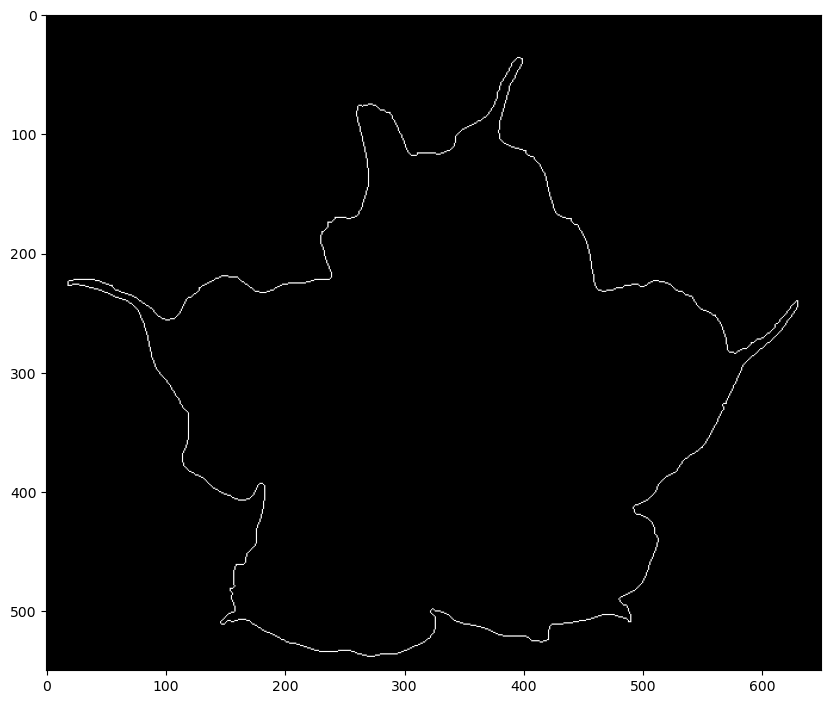

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
from scipy.ndimage import binary_erosion, binary_dilation
from imageio.v2 import imread

def my_boundary(img):
    """
    Compute boundary of binary image.

    Parameters
    ----------
    img : ndarray of bools
        A binary image.
        
    Returns
    -------
    boundary : ndarray of bools
        The boundary as a binary image.
    """
    
    boundary = img.copy() 
    # to thicken the boundary one can first use binary dilation on the image
    # boundary = binary_dilation(img)
    erroded_img = binary_erosion(img)
    shape = img.shape
    for x in range(shape[0]-1):
        for y in range(shape[1]-1):
            if(img[x,y] and erroded_img[x,y]):
                boundary[x,y] = False
    return boundary
    
    
img = imread("images/engelstrompete.png") > 0
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(my_boundary(img))
plt.show()

### b)  Distance transform

Implement distance transform according to the ideas of (CV-05 slides 34ff).  Discuss the effect of different structuring elements.

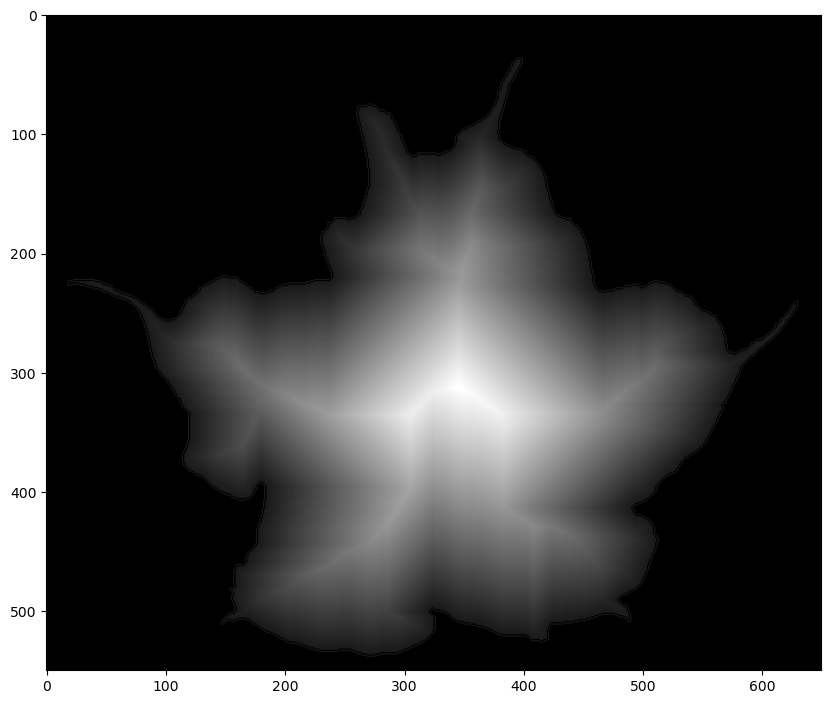

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import generate_binary_structure, binary_erosion
from imageio.v2 import imread

def my_distance_transform(img):
    """Distance transform of binary image.

    Args:
    img (ndarray of bools): A binary image.
        
    Returns:
    dt (ndarray of ints): The distance transform of the input image.
    """
    
    dt = np.zeros(img.shape,np.int32)
    shape = img.shape
    temp_img = binary_erosion(img)
    temp_boundary = my_boundary(img)
    counter = 1
    
    while(np.any(temp_img)):
        for x in range(shape[0]-1):
            for y in range(shape[1]-1):
                if(temp_boundary[x,y]):
                    dt[x,y] = counter + 20
        counter += 1
        temp_img = binary_erosion(temp_img)
        temp_boundary = my_boundary(temp_img)

    return dt


img = imread("images/engelstrompete.png") > 0
plt.figure(figsize=(10,10))
plt.imshow(my_distance_transform(img))# + 0.5 * img)
plt.show()

A different structuring element would affect the gradient the distance transform would show. If you would use a bigger structuring element for example the border would shrink more with each iteration therefore the value of the gradient would get higher more slowly.

### c) Morphing

Write a function `my_morph` that implements morphing according to (CV-05 slide 41). You may use your function `my_distance_transform` from part b), or the function `distance_transform_edt` from `scipy.ndimage`.

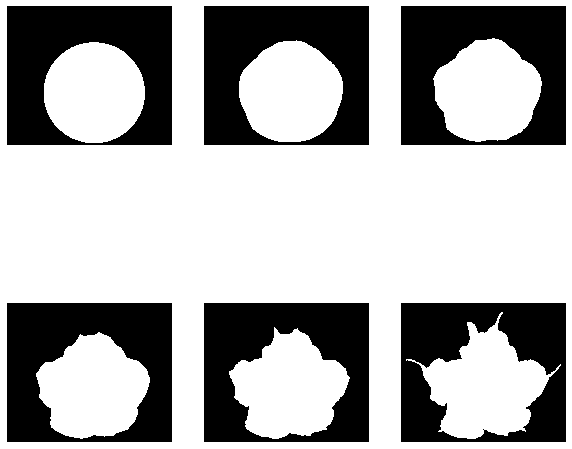

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt
from imageio import imread


def my_morph(A,B,ratio):
    """Morphing from binary image A to image B.

    Args:
        A (ndarray of bools): A binary image (start).
        B (ndarray of bools): A binary image (target), same shape as A.
        ratio (float from 0.0 to 1.0): The ratio of image A and image B.
            0.0=only image A, 1.0=only image B.
        
    Returns:
        morph (ndarray of bools): A binary intermediate image between A and B.
        
    """

    result = np.zeros(A.shape, bool)
    
    Da = distance_transform_edt(A)-distance_transform_edt(~A)
    Db = distance_transform_edt(B)-distance_transform_edt(~B)
    
    result = (ratio * Db + (1-ratio)*Da) > 0
    return result

img1 = imread("images/kreis.png") > 0
img2 = imread("images/engelstrompete.png") > 0


plt.figure(figsize=(10,10))
plt.gray()
for i, ratio in enumerate(np.linspace(0, 1, 6), 1):
    plt.subplot(2, 3, i)
    plt.imshow(my_morph(img1, img2, ratio))
    plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


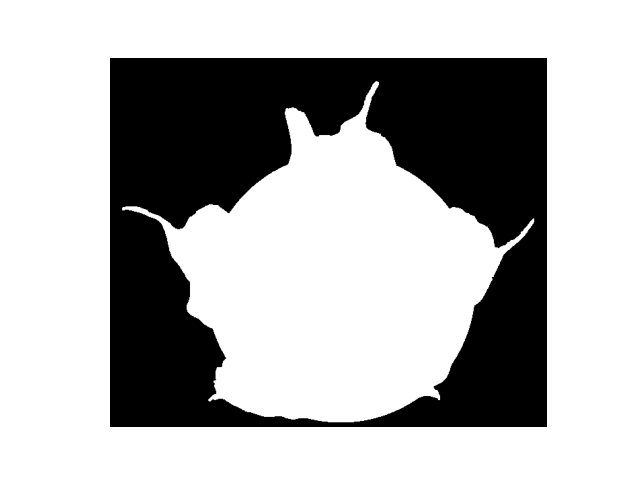

In [65]:
# If you want to see your morph as an animation, run this cell. 
# Close the output (press the blue "Stop interaction" button) once you are done!

# Due to some matplotlib problem you may have to restart your kernel!
%matplotlib notebook
import matplotlib.animation as animation
fig = plt.figure()

ims = []
for i, ratio in enumerate(np.linspace(0, 1, 24), 1):
    plt.axis('off')
    im = plt.imshow(my_morph(img1, img2, ratio), cmap='gray', animated=True)
    ims.append([im])  
    
ani = animation.ArtistAnimation(fig, ims + list(reversed(ims)), interval=100, blit=True)

fig.show()

## Assignment 3: Implementation: Skeletonization (5 points)

### a) Skeletonization with hit-or-miss

Explain in your own words, how the hit-or-miss operator can be used for skeletonization (cf CV-05 slide 49).  

We can use hit-or-miss operator to detect some patterns. For skeletonization, we need to find ridges of the image so have to detect boundary pixels. Use 8 hit-or-miss operations to detect boundary pixels of left, right, top, bottom and the four diagonals. If something is detected, remove the pixels from skeletion. After few iterations, we can find the skeleton of the image.

### b) Implementation of skeletonization

Now use this method to implement your own skeletonization function. It is ok to use
`scipy.ndimage.morphology.binary_hit_or_miss` here (but of course *not* `skimage.morphology.skeletonize` or similar functions). Compare your result with (CV-05 slide 50). Note that computing the skeleton using this method may take some time ...

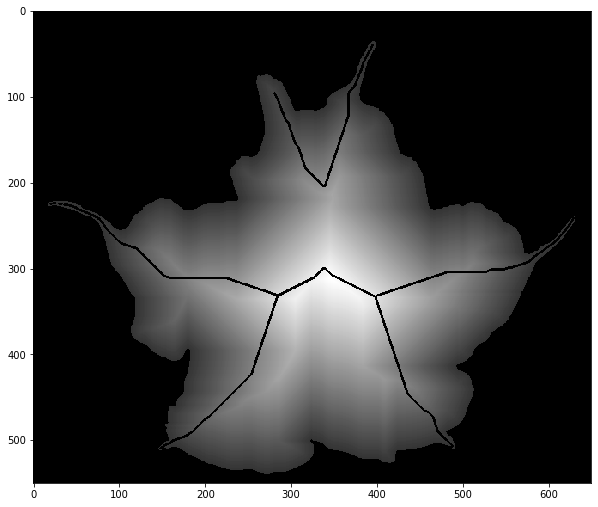

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_hit_or_miss, distance_transform_cdt, binary_dilation
from imageio import imread

def my_skeletonize(img):
    """
    Compute the skeloton of a binary image using hit_or_miss operator.
    
    Parameters
    ----------
    img : ndarray of bools
        Binary image to be skeletonized.
    
    Returns
    -------
    skeleton : ndarray of bools
        The skeleton of the input image.
    """

    skel = img.copy()
    temp = np.full(img.shape, True)
   
    while(np.any(temp)) :
        hit = np.array([[0, 0, 1], [0, 1, 1], [0, 0, 1]])    
        miss = np.array([[1, 0, 0], [1, 0, 0], [1, 0, 0]])
        temp = binary_hit_or_miss(skel, hit, miss)
        
        hit = np.array([[1, 0, 0], [1, 1, 0], [1, 0, 0]])
        miss = np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1]])
        temp = np.logical_or(temp, binary_hit_or_miss(skel, hit, miss))

        hit = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1]])
        miss = np.array([[1, 1, 1], [0, 0, 0], [0, 0, 0]])
        temp = np.logical_or(temp, binary_hit_or_miss(skel, hit, miss))

        hit = np.array([[1, 1, 1], [0, 1, 0], [0, 0, 0]])
        miss = np.array([[0, 0, 0], [0, 0, 0], [1, 1, 1]])
        temp = np.logical_or(temp, binary_hit_or_miss(skel, hit, miss))

        hit = np.array([[0, 1, 1], [0, 1, 1], [0, 0, 0]])
        miss = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0]])
        temp = np.logical_or(temp, binary_hit_or_miss(skel, hit, miss))
        
        hit = np.array([[0, 0, 0], [0, 1, 1], [0, 1, 1]])
        miss = np.array([[1, 1, 0], [1, 0, 0], [0, 0, 0]])  
        temp = np.logical_or(temp, binary_hit_or_miss(skel, hit, miss))
        
        hit = np.array([[1, 1, 0], [1, 1, 0], [0, 0, 0]])
        miss = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 1]])
        temp = np.logical_or(temp, binary_hit_or_miss(skel, hit, miss))

        hit = np.array([[0, 0, 0], [1, 1, 0], [1, 1, 0]])
        miss = np.array([[0, 1, 1], [0, 0, 1], [0, 0, 0]])
        temp = np.logical_or(temp, binary_hit_or_miss(skel, hit, miss))
        
        for x in range(img.shape[0]):
            for y in range(img.shape[1]) :
                if (temp[x][y]) :
                    skel[x][y] = False
                    
    return skel


img = imread("images/engelstrompete.png") > 0
skel = my_skeletonize(img)
result = distance_transform_cdt(img, metric='taxicab') + (50 * img)
result[binary_dilation(skel)] = 0
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(result)
plt.show()

## Assignment 4: Custom Structuring Element (5 points)

Landsat 7 is a satelite mission for acquisition of satellite imagery of Earth. Unfortunately the Scan Line Corrector failed, resulting in black stripes on the aquired images. More information: [https://www.usgs.gov/landsat-missions]


### a) A first fix

A rather crude fix is to apply a custom structuring element for dilation and erosion (see CV-05, 24ff). Complement the code below (in part (b)) in the following way:
* Rotate the image such that the gaps are horizontal.
* Dilate the rotated image with a vertical structuring element. I.e. take the maximum of an area of size $7 \times1$ and assign it to the center pixel. Repeat for all pixels.
* Erode the dilated image.
* Rotate the result back.

Remark: this exercise applies morphological operator to color images. This extends the idea of generalizing morphological operators to gray value images (CV-05, slide 51).  

### b) Improving the solution
You may get better results by thresholding and applying the morphological operations only to pixels below a threshold, i.e. gap pixels. Compliment your solution from a). 

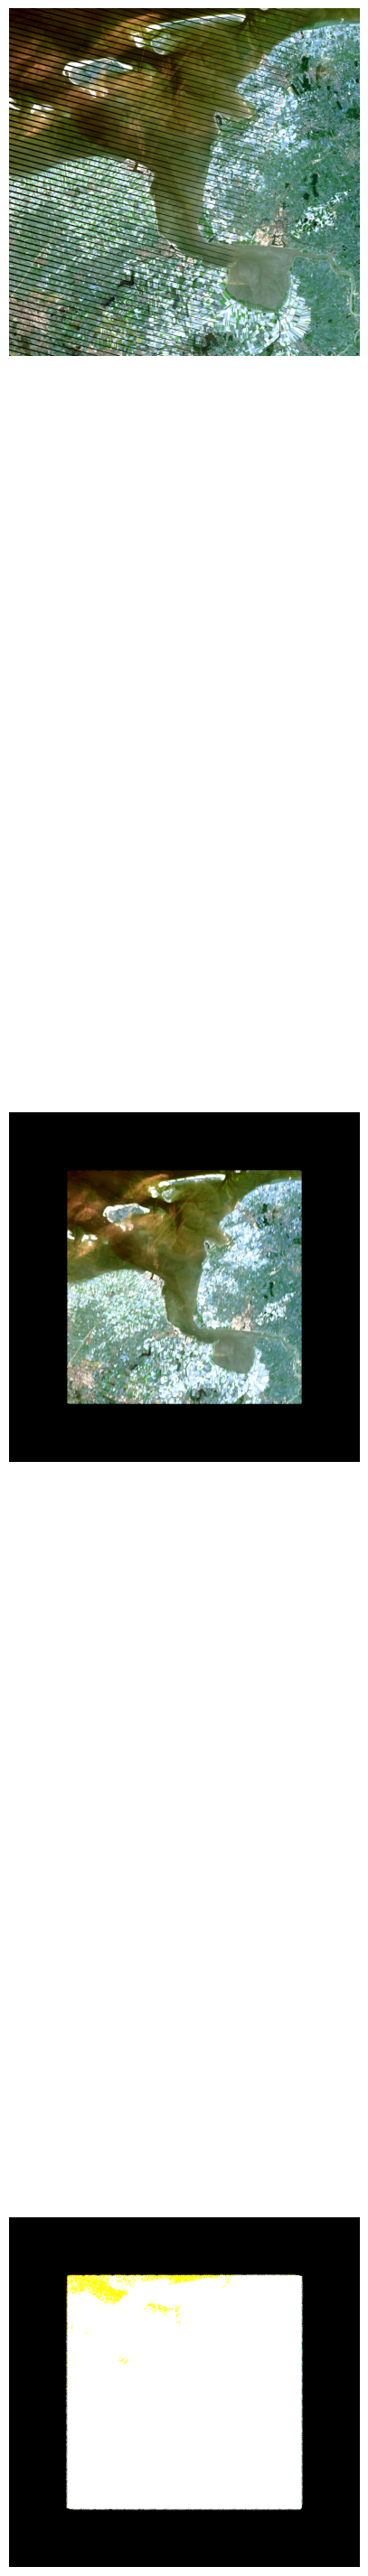

In [10]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.ndimage as ndimg
from skimage import color
#from skimage.color import separate_stains
from skimage.transform import rescale as rescale
from imageio.v2 import imread
from skimage import img_as_float
from skimage.morphology import erosion, dilation 

angle = 15
thresh = .3
struc_elem = np.ones((5,1), dtype=bool)

def abstract_method(self):
    raise NotImplemented
        

img = imread("images/landsat_stack2.png")
img2 = img.copy()
img3 = img.copy()

                             
img = (img - np.min(img))/np.ptp(img)
img3 = (img3 - np.min(img3))/np.ptp(img3)

rotat_img = ndimg.rotate(img2, angle)
img3_dilation = cv2.dilate(rotat_img, np.ones((7,1), np.uint8), iterations = 1)
img3_erosion = cv2.dilate(rotat_img, np.ones((5,1), np.uint8), iterations = 1)
img3 = ndimg.rotate(img3_erosion, -15)
#img2 = (img3)                                 

th, thresh_img = cv2.threshold(img3, thresh, 255, cv2.THRESH_BINARY)                            

plt.figure(figsize=(5,45))
plt.subplot(3,1,1); plt.imshow(img); plt.axis('off')
plt.subplot(3,1,2); plt.imshow(img3); plt.axis('off')
plt.subplot(3,1,3); plt.imshow(thresh_img); plt.axis('off')
plt.show()


### c) Bonus
Can you think of (and implement) other ways to add the missing data? 


YOUR ANSWER HERE

## Bonus: Painting with a webcam using color detection

If you solve this assignment you may leave out one of the other assignments. There will be similar assignments on most of the following sheets. These bonus assignments are intended to show potential applications of the techniques you learnt in class. They are usually a bit more challenging and often there exist multiple ways to address them. Even if you do not intend to solve them, you may profit from at least taking a look.

### Testing your webcam: Images
From now on we will try to make the exercises a bit more interactive and use live feed from your webcam. Unfortunately, using the webcam may not always work out of box (depending on your hardware/os configuration). So first make sure that you can grab an image from the webcam.

1. Use the `imageio` library as presented in the tutorial sessions. You will probably need to install `ffmpeg` packages as shown in the tutorial code.
1. Use the `cv2` library (opencv will use `gstreamer`). You will probably need to install then `opencv` package.

Hint: Sometimes it helps to restart the kernel.

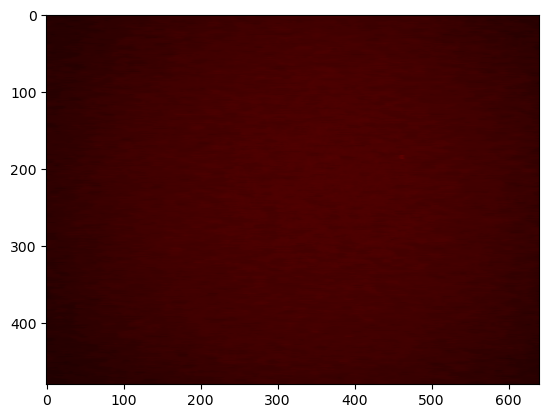

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

# number of your webcam (usually 0)
webcam = 0

# Set this flag to either use "imageio" or "cv2"
use_imageio = False

if use_imageio:
    # use imageio for accessing the webcam (requires ffmpeg to be installed on your computer)
    import imageio
    try:
        with imageio.get_reader(f'<video{webcam}>') as reader:
            img = reader.get_next_data()
            ok = True
    except:
        ok = False
else:
    # use opencv for accessing the webcam
    import cv2
    try:
        camera = cv2.VideoCapture(webcam)
        ok, img = camera.read()
        if ok:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    finally:
        camera.release()

if ok:
    plt.imshow(img)
    plt.show()
else:
    print("Accessing your webcam failed.")

### Testing your webcam: Video

You can now test your webcam with video. A video stream is essentially a loop that repeatedly fetches new images and displays them. We will provide two code skeletons for such a loop, one for `imageio` and one for `cv2`(OpenCV), that you may use for your code. Make sure, you have set your `webcam` variable to a valid camera index.

**imageio**

For `imageio` you may use the following code:

In [28]:
%matplotlib notebook
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import imageio

try:
    display(HTML("press <kbd>I</kbd>, <kbd>I</kbd> (Kernel Interrupt) to stop the demo!"))
    with imageio.get_reader(f'<video{webcam}>') as reader:
        fig = plt.figure(figsize=(8,6))
        mpl_image = plt.imshow(reader.get_next_data())

        while True:
            img = reader.get_next_data()
            mpl_image.set_data(img)
            fig.canvas.draw()
except KeyboardInterrupt:
    print("Interrupted")
finally:
    reader.close()
    # plt.close(fig)
    print("Camera was closed.")

NameError: name 'reader' is not defined

**OpenCV**

For `cv2` you may use the following code:

<IPython.core.display.Javascript object>


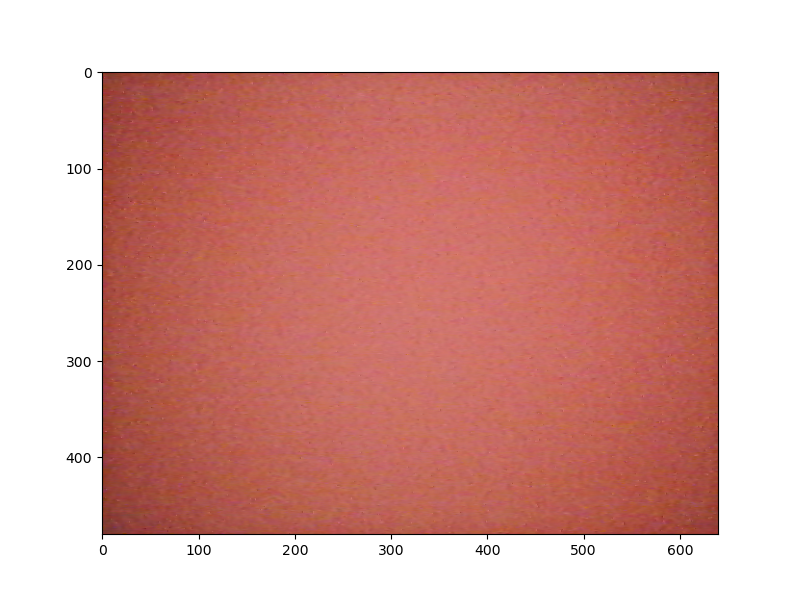

Interrupted
Camera was closed.


In [32]:
%matplotlib notebook
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import cv2
       
try:
    display(HTML("press <kbd>I</kbd>, <kbd>I</kbd> (Kernel Interrupt) to stop the demo!"))
    camera = cv2.VideoCapture(webcam)
    ok, img = camera.read()
    if ok:
        fig = plt.figure(figsize=(8,6))
        mpl_image = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    while ok:
        mpl_image.set_data(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        fig.canvas.draw()
        ok, img = camera.read()
except KeyboardInterrupt:
    print("Interrupted")
finally:
    camera.release()
    # plt.close(fig)
    print("Camera was closed.")

### a) Color detection
In this task we will track a small colored object (like the cap of a pen) in front of a neutral background of a different color. We will use the location of the object to paint on a virtual canvas. For that you have to implement the following tasks in the `draw_func` function:

* Convert the image `img` given to the `draw_func` into HSV color space. 
* Measure the color of your object. You may return the converted image and interactively measure the color with your mouse. Define your measured hue value in a constant
* Discard all channel except the hue channel. 
* Find the location with the most similar hue to the measured hue of your object.
* Paint a marker, for example a circle, at this position in `img_draw`.

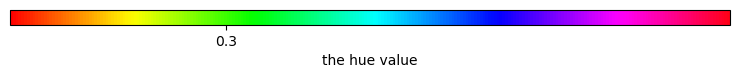

In [30]:
%matplotlib inline

import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from skimage.color import rgb2hsv
from skimage.draw import disk

# Adapt this hue value to the hue of your object
hue = .3

# A global canvas to draw on
canvas = np.zeros((480,640,3), np.uint8) 

# radius and color of the brush
radius = 5
color = (255,255,255)

# saturation threshold for object
thresh = .2

def draw_func(img):
    """
    Draw a circle on img_draw at the detected object location.
    
    Args:
        img          the RGB input image (uint8)

    Returns:
        img_draw     img with circle drawn at postion of object
    """
    global canvas, hue, radius, color
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return canvas

# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(8, 1))
ax = fig.add_axes([0.05, 0.80, 0.9, 0.15])
cb = mpl.colorbar.ColorbarBase(ax, cmap=mpl.cm.hsv, orientation='horizontal',
                               norm=mpl.colors.Normalize(vmin=0, vmax=1))
cb.set_ticks([hue])
cb.set_label('the hue value')
plt.show()

First test your function with single image. You may either grab an image from your webcam (as described above), or choose an arbitrary image from wherever you like

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

draw_func(img)
plt.subplot(1,2,1); plt.imshow(img)
plt.subplot(1,2,2); plt.imshow(canvas)
plt.show()

NotImplementedError: 

### b) Implement the paint functionality

Now run your function on video, interatively updateing the image.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()